In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# set path to experimental data
data_dir = '../data/experimental_data/'

In [3]:
# load sam files for bound 8 8, left and right reads
# skip header
# only read in first 10 columns
bound_8_8_left = np.loadtxt(data_dir + '/secondFromProt8/prot8/GAG_BO_8_8.1.sam', dtype=str, delimiter='\t', skiprows=3, usecols=range(10))
bound_8_8_right = np.loadtxt(data_dir + '/secondFromProt8/prot8/GAG_BO_8_8.2.sam', dtype=str, delimiter='\t', skiprows=3, usecols=range(10))

In [4]:
print(bound_8_8_left.shape)
print(bound_8_8_right.shape)
print(bound_8_8_left[0])
print(bound_8_8_right[0])

(3483872, 10)
(3483872, 10)
['NB500937:402:HY7YGAFXY:1:11101:24170:1067' '0' '5NL43' '21' '70' '6S70M'
 '*' '0' '0'
 'GACCATATCTGAGCCTGGGAGCTCTCTGGCTAACTAGGGAACCCACTGCTTAAGCCTCGATAAAGCCTGCCTTGAG']
['NB500937:402:HY7YGAFXY:1:11101:24170:1067' '16' '5NL43' '230' '70'
 '75M1S' '*' '0' '0'
 'TCTCGACACAGGACTCGGCTTGCTGAAGCGCGCACGGCAAGAGGCGAGGGGCGGCGACTGGTGAGTACGCCAAAAT']


In [5]:
# show all unique flag values for column 2
print(np.unique(bound_8_8_left[:,1]))

['0' '16' '4']


In [6]:
# check in how many cases the left and right read have the same flag value
print(np.sum(bound_8_8_left[:,1] == bound_8_8_right[:,1]))
# check in how many cases the left and right read have different flag values
print(np.sum(bound_8_8_left[:,1] != bound_8_8_right[:,1]))
# check in how many cases the left and right read both have flag value 4
print(np.sum((bound_8_8_left[:,1] == '4') & (bound_8_8_right[:,1] == '4')))
# check in how many cases only the left or right read have flag value 4
print(np.sum((bound_8_8_left[:,1] == '4') ^ (bound_8_8_right[:,1] == '4')))

2138311
1345561
2138114
18499


In [11]:
# get rid of all reads that have flag value 4 in either left or right read
bound_8_8_left_filtered = bound_8_8_left[(bound_8_8_left[:,1] != '4') | (bound_8_8_right[:,1] != '4')]
bound_8_8_right_filtered = bound_8_8_right[(bound_8_8_left[:,1] != '4') | (bound_8_8_right[:,1] != '4')]
print(bound_8_8_left_filtered.shape)
print(bound_8_8_right_filtered.shape)

(1345758, 10)
(1345758, 10)


In [12]:
# check in how many cases the left and right read have the same flag value
print(np.sum(bound_8_8_left_filtered[:,1] == bound_8_8_right_filtered[:,1]))
# check in how many cases the left and right read have different flag values
print(np.sum(bound_8_8_left_filtered[:,1] != bound_8_8_right_filtered[:,1]))

197
1345561


(array([2.93124e+05, 7.34400e+03, 1.59550e+04, 2.12810e+04, 2.47320e+04,
        1.57080e+04, 9.57000e+03, 9.07300e+03, 8.74400e+03, 1.23310e+04,
        1.00600e+04, 6.57300e+03, 2.85640e+04, 1.00340e+04, 1.17990e+04,
        8.70900e+03, 9.15200e+03, 2.71080e+04, 6.95400e+03, 1.77320e+04,
        1.33590e+04, 1.83940e+04, 9.26200e+03, 4.80800e+03, 1.20880e+04,
        8.70100e+03, 1.04370e+04, 8.23800e+03, 4.95900e+03, 1.14250e+04,
        1.30500e+04, 2.27810e+04, 8.34700e+03, 8.12800e+03, 1.18380e+04,
        1.82380e+04, 6.11300e+03, 9.76500e+03, 1.09530e+04, 7.71700e+03,
        1.32110e+04, 6.77300e+03, 1.12830e+04, 1.07950e+04, 1.39890e+04,
        1.41710e+04, 6.89700e+03, 5.83700e+03, 8.11800e+03, 1.15550e+04,
        5.26500e+03, 1.10990e+04, 1.45900e+04, 1.04100e+04, 1.69500e+04,
        1.22110e+04, 1.62960e+04, 7.43000e+03, 8.85300e+03, 2.56980e+04,
        8.90100e+03, 4.78400e+03, 9.02300e+03, 4.85900e+03, 2.08900e+03,
        5.58700e+03, 1.36700e+04, 1.68630e+04, 1.48

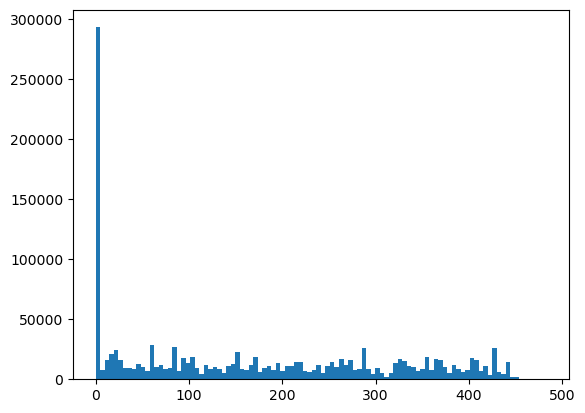

In [13]:
# plot histogram of the values of column 4
plt.hist(bound_8_8_left_filtered[:,3].astype(int), bins=100)

(array([1.11616e+05, 1.28880e+04, 2.03360e+04, 2.79390e+04, 2.43040e+04,
        3.33470e+04, 1.33710e+04, 1.82910e+04, 1.52930e+04, 2.07790e+04,
        1.85540e+04, 1.01510e+04, 3.51330e+04, 1.54270e+04, 1.42800e+04,
        1.85980e+04, 1.10480e+04, 5.14340e+04, 6.40200e+03, 2.10810e+04,
        1.63120e+04, 2.47560e+04, 1.15320e+04, 8.25300e+03, 1.48380e+04,
        1.15420e+04, 1.30870e+04, 1.01490e+04, 6.16100e+03, 1.59920e+04,
        2.18530e+04, 2.37020e+04, 1.02280e+04, 1.08060e+04, 1.47720e+04,
        2.29190e+04, 7.77200e+03, 8.97700e+03, 1.16290e+04, 7.93000e+03,
        1.42940e+04, 9.70100e+03, 9.40200e+03, 9.57200e+03, 1.35240e+04,
        1.53430e+04, 6.49300e+03, 5.66300e+03, 8.11800e+03, 1.18430e+04,
        4.88800e+03, 1.06500e+04, 1.55530e+04, 1.17200e+04, 1.55770e+04,
        1.18000e+04, 1.32370e+04, 7.08600e+03, 1.01100e+04, 2.79990e+04,
        7.81800e+03, 4.43000e+03, 9.15200e+03, 4.64300e+03, 2.51400e+03,
        5.12600e+03, 1.35890e+04, 1.81920e+04, 1.17

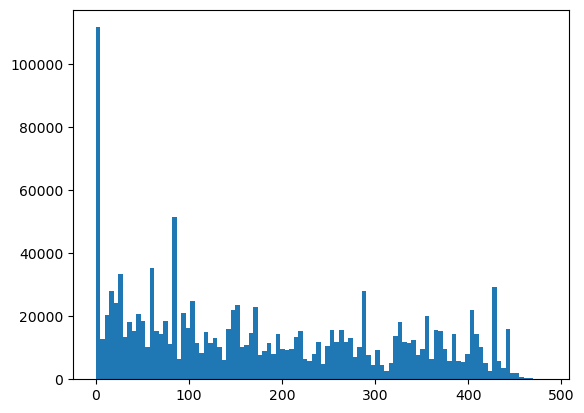

In [14]:
# do same hist for right read
plt.hist(bound_8_8_right_filtered[:,3].astype(int), bins=100)

In [15]:
# get unique values of column 5
print(np.unique(bound_8_8_left_filtered[:,4]))
print(np.unique(bound_8_8_right_filtered[:,4]))

['0' '12' '14' '16' '17' '18' '20' '21' '24' '25' '26' '27' '29' '30' '31'
 '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47' '48'
 '49' '5' '51' '53' '54' '55' '57' '58' '59' '6' '60' '61' '63' '65' '66'
 '67' '70' '8']
['0' '10' '12' '14' '15' '18' '20' '22' '24' '25' '26' '27' '29' '30' '31'
 '33' '34' '35' '36' '37' '39' '41' '42' '43' '45' '47' '48' '49' '50'
 '51' '53' '54' '55' '57' '59' '6' '61' '63' '65' '66' '67' '68' '69' '70'
 '8']


(array([3.051000e+03, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        1.600000e+01, 0.000000e+00, 0.000000e+00, 4.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.100000e+01, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        1.000000e+00, 9.000000e+00, 0.000000e+00, 0.000000e+00,
        2.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 2.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 3.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00, 1.300000e+01, 0.000000e+00,
        4.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 3.000000e+00, 4.000000e+00,
        2.000000e+00, 0.000000e+00, 2.000000e+00, 3.000000e+00,
        0.000000e+00, 2.000000e+00, 9.000000e+00, 0.000000e+00,
        6.000000e+00, 2.000000e+00, 1.00

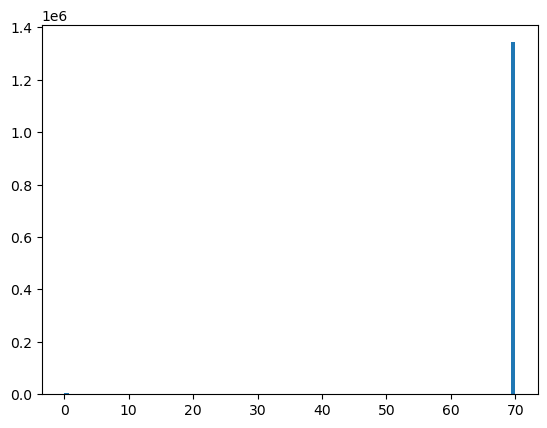

In [16]:
# plot histogram of the values of column 5
plt.hist(bound_8_8_left_filtered[:,4].astype(int), bins=100)

(array([1.544800e+04, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.100000e+01, 0.000000e+00, 0.000000e+00, 3.000000e+00,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.600000e+01, 0.000000e+00, 0.000000e+00,
        2.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.500000e+01, 0.000000e+00, 0.000000e+00,
        4.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
        0.000000e+00, 0.000000e+00, 9.000000e+00, 1.000000e+00,
        0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 3.000000e+00, 6.000000e+00, 0.000000e+00,
        2.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        2.000000e+00, 0.000000e+00, 5.000000e+00, 7.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 9.000000e+00, 0.000000e+00,
        4.000000e+00, 3.000000e+00, 0.00

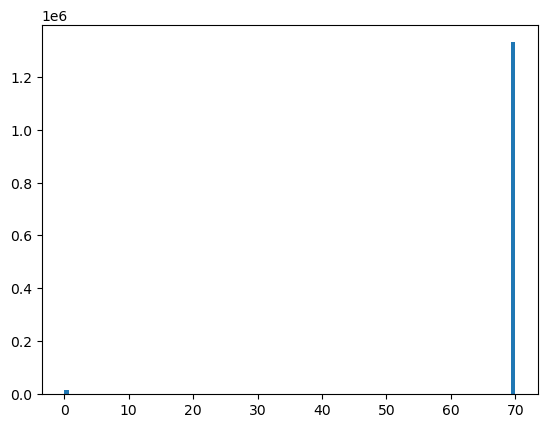

In [17]:
# do same hist for right read
plt.hist(bound_8_8_right_filtered[:,4].astype(int), bins=100)

In [19]:
# only keep reads that have value 70 in column 5 in both left and right read
bound_8_8_left_filtered2 = bound_8_8_left_filtered[(bound_8_8_left_filtered[:,4] == '70') & (bound_8_8_right_filtered[:,4] == '70')]
bound_8_8_right_filtered2 = bound_8_8_right_filtered[(bound_8_8_left_filtered[:,4] == '70') & (bound_8_8_right_filtered[:,4] == '70')]
print(bound_8_8_left_filtered2.shape)
print(bound_8_8_right_filtered2.shape)

(1326945, 10)
(1326945, 10)


In [21]:
# in column 6 are cigar strings
# get all unique cigar strings
cigar_letters = np.unique(np.concatenate((np.unique(bound_8_8_left_filtered2[:,5]), np.unique(bound_8_8_right_filtered2[:,5]))))
# get all unique letters that appear in cigar strings
cigar_letters = np.unique(np.concatenate([list(x) for x in cigar_letters]))
print(cigar_letters)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'D' 'I' 'M' 'S']
